In [1]:
import sys
sys.path.append('..')
import pymbd
from mbd import mbd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bohr = mbd.bohr

In [3]:
def get_free_atom_data(species):
    return list(zip(*[(at['alpha_0'], at['C6'], at['R_vdw']) for at in [pymbd.free_atom_db[sp] for sp in species]]))

In [4]:
mbd.init_grid(30)

In [5]:
mbd.my_task = 0
mbd.n_tasks = 1

## Argon dimer

In [ ]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [ ]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr

In [ ]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [ ]:
mbd.get_single_mbd_energy('', 'fermi,dip', xyz, alpha_0, omega, r_vdw=R_vdw, beta=1., a=6.)[0]

In [ ]:
mbd.get_qho_rpa_energy('', 'fermi,dip', xyz, mbd.alpha_dynamic_ts_all('C', mbd.n_grid_omega, alpha_0, c6=C6),
                       r_vdw=R_vdw, beta=1., a=6.)[0]

In [ ]:
mbd.get_ts_energy('', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6.)

## Linear argon chain

In [6]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [7]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [8]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [9]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [10]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

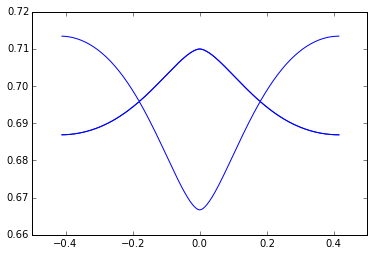

In [11]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [12]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [13]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

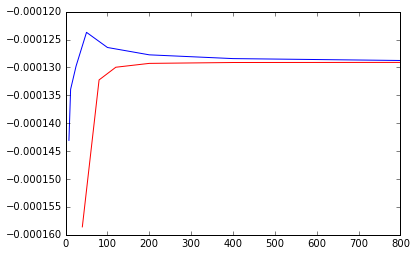

In [14]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [15]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

-0.00012831280394436066

In [16]:
(enes_supercell[-1], enes_periodic[-1])

(-0.00012876096463059527, -0.00012910460961087778)

In [17]:
mbd.param_mbd_supercell_cutoff = 30./bohr

In [18]:
mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.0001213294099366468

In [19]:
mbd.get_supercell_mbd_energy('PQ', 'fermi,dip', xyz, alpha_0, omega, uc,
                             r_vdw=R_vdw, beta=1., a=6.)[0]

-0.00012138396344336484

## Linear argon chain (2 atoms in cell)

In [ ]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [ ]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (4., 0., 0.)]/bohr
uc = np.array([(8., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [ ]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [ ]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [ ]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

In [ ]:
plt.plot(*chain.from_iterable((
            *zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))),
            'b-',
            *zip(*sorted(zip(k_grid[:, 0]+2*np.pi/8*bohr, omegas[:, i]))),
            'b-'
        ) for i in range(omegas.shape[1])))

In [ ]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [ ]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

In [ ]:
plt.plot(cutoffs, enes_supercell, 'b',
         10*np.array(ns_kpt), enes_periodic, 'r')

In [ ]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)/2

In [ ]:
(enes_supercell[-1]/2, enes_periodic[-1]/2)

## Two parallel argon chains

In [ ]:
mbd.param_dipole_matrix_accuracy = 1e-10

In [ ]:
species = ['Ar', 'Ar']
xyz = [(0., 0., 0.), (0., 0., 4.)]/bohr
uc = np.array([(4., 0., 0.), (0., 10., 0.), (0., 0., 10.)])/bohr
mbd.param_vacuum_axis = (False, True, True)

In [ ]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [ ]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(200, 1, 1), uc)

In [ ]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

In [ ]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [ ]:
ns_kpt = [4, 8, 12, 20, 40, 80]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, 1, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [ ]:
cutoffs = [8., 12., 25., 50., 100., 200., 400., 800.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

In [ ]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [ ]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

In [ ]:
(enes_supercell[-1], enes_periodic[-1])

## Argon crystal

In [ ]:
species = ['Ar']
xyz = [(0., 0., 0.)]/bohr
uc = np.array([(4., 0., 0.), (0., 4., 0.), (0., 0., 4.)])/bohr
mbd.param_vacuum_axis = (False, False, False)

In [ ]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [ ]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(30, 1, 1), uc)

In [ ]:
mbd.param_dipole_matrix_accuracy = 1e-7

In [ ]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

In [ ]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [ ]:
ns_kpt = [3, 4, 5]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, n_kpt), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [ ]:
cutoffs = [8., 12.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

In [ ]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')

In [ ]:
mbd.get_ts_energy('P', 'fermi2', xyz, C6, alpha_0, r_vdw=R_vdw, s_r=1., d=6., unit_cell=uc)

## Graphene

In [ ]:
mbd.param_dipole_matrix_accuracy = 1e-7

In [ ]:
species = ['C', 'C']
xyz = [(0., 0., 0.), (2.46000413, 1.42034734, 0.)]/bohr
uc = np.array([
    (2.45999892, 0.00000000, 0.00000000),
    (1.22999946, 2.13042155, 0.00000000),
    (0.00000000, 0.00000000, 100.00000000)])/bohr
mbd.param_vacuum_axis = (False, False, True)

In [ ]:
alpha_0, C6, R_vdw = get_free_atom_data(species)
omega = mbd.omega_eff(C6, alpha_0)

In [ ]:
k_grid = mbd.make_k_grid(mbd.make_g_grid(100, 1, 1), uc)

In [ ]:
omegas = mbd.get_reciprocal_mbd_energy('REV', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[1]

In [ ]:
plt.plot(*chain.from_iterable((*zip(*sorted(zip(k_grid[:, 0], omegas[:, i]))), 'b-') for i in range(omegas.shape[1])))

In [ ]:
ns_kpt = [4, 6, 8, 10]
enes_periodic = []
for n_kpt in ns_kpt:
    k_grid = mbd.make_k_grid(mbd.make_g_grid(n_kpt, n_kpt, 1), uc)
    ene = mbd.get_reciprocal_mbd_energy('R', 'fermi,dip', xyz, alpha_0, omega, k_grid, uc,
                                      r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_periodic.append(ene)

In [ ]:
cutoffs = [8., 12., 16.]
enes_supercell = []
for cutoff in cutoffs:
    mbd.param_mbd_supercell_cutoff = cutoff/bohr
    ene = mbd.get_supercell_mbd_energy('P', 'fermi,dip', xyz, alpha_0, omega, uc,
                                       r_vdw=R_vdw, beta=1., a=6.)[0]
    enes_supercell.append(ene)

In [ ]:
plt.plot(cutoffs, enes_supercell, 'b',
         [10*x for x in ns_kpt], enes_periodic, 'r')